# Biblioteki Pythona w analizie danych

## Tomasz Rodak

Wykład 1

---

Literatura:

- [PRML](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) Christopher M. Bishop, "Pattern Recognition and Machine Learning", 2006.
- [PML-1](https://probml.github.io/pml-book/) Kevin P. Murphy, "Probabilistic Machine Learning: An Introduction", 2022.
- [Dokumentacja NumPy](https://numpy.org/doc/stable/)

# Regresja

Z problemem regresji mamy do czynienia wtedy, gdy interesuje nas zależność między **ciągłą** zmienną objaśnianą a jedną lub kilkoma zmiennymi objaśniającymi. Częsty, choć nie jedyny, sposób reprezentacji problemu regresji wygląda następująco. Niech $Y$ oznacza zmienną objaśnianą oraz niech $X_1, X_2, \ldots, X_p$ oznaczają zmienne objaśniające. Wówczas do opisu problemu regresji możemy zaproponować następujący model:

\begin{equation*}
Y = f(X_1, X_2, \ldots, X_p) + \varepsilon,
\end{equation*}

gdzie $f\colon \mathbb{R}^p \to \mathbb{R}$ jest nieznaną funkcją stanowiącą deterministyczną część zależności między $Y$ a $X_1, X_2, \ldots, X_p$, a $\varepsilon$ jest losowym składnikiem błędu. Funkcję $f$ nazywamy **funkcją regresji**.

O $\varepsilon$ zakładamy (co najmniej), że ma wartość oczekiwaną równą zero i stałą (niezależną od $X_1, X_2, \ldots, X_p$) wariancję:

\begin{align*}
\mathbb{E}(\varepsilon) &= 0, \\
\text{Var}(\varepsilon) &= \sigma^2.
\end{align*}

Mocniejsze założenie polega na przyjęciu, że $\varepsilon$ jest zmienną losową o rozkładzie normalnym, tj. $\varepsilon \sim \mathcal{N}(0, \sigma^2)$. 

Rozwiązanie problemu regresji polega na estymacji na podstawie danych obserwacyjnych funkcji $f$ oraz, ewentualnie, rozkładu $\varepsilon$.


Ponieważ nie ma sposobu na przeszukanie całej przestrzeni wszystkich możliwych funkcji $f$, więc zakłada się pewne ograniczenia na jej postać lub na przestrzeń, z której pochodzi. W zależności od tych ograniczeń wyróżnia się różne rodzaje regresji. Najbardziej ograniczającym założeniem jest przyjęcie, że $f$ jest liniowa - wtedy mówimy o **regresji liniowej**.

## Regresja liniowa

W regresji liniowej zakłada się, że funkcja $f$ jest liniowa, tj.

$$
f(x_1, x_2, \ldots, x_p) = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_p x_p
$$

dla pewnych współczynników $w_0, w_1, w_2, \ldots, w_p$. Wtedy model regresji liniowej ma postać

$$
Y = w_0 + w_1 X_1 + w_2 X_2 + \ldots + w_p X_p + \varepsilon.\tag{1}
$$

Wektor $\mathbf{w} = [w_0, w_1, w_2, \ldots, w_p]^T$ nazywamy **wektorem wag** a jego składowe **współczynnikami regresji**. 
Wektor wag jest nieznany: zakładamy, że prawdziwa funkcja $f$ występująca w procesie generowania danych jest liniowa, nie znamy jednak wartości współczynników definiujących tę funkcję. Dzięki założeniu o liniowości $f$ problem wyznaczenia funkcji regresji sprowadza się do wyznaczenia wektora wag $\mathbf{w}$.


Równanie $(1)$ można bardziej zwięźle zapisać w postaci macierzowej jako

$$
Y = \begin{bmatrix} w_0 & w_1 & w_2 & \ldots & w_p \end{bmatrix} \begin{bmatrix} 1 \\ X_1 \\ X_2 \\ \vdots \\ X_p \end{bmatrix} + \varepsilon =
 \mathbf{w}^T X + \varepsilon,\tag{2}
$$

gdzie $X = [1, X_1, X_2, \ldots, X_p]^T$. Dodanie jedynki na początku wektora $X$ jest standardowym zabiegiem, który pozwala na wygodne i proste zapisanie równania regresji liniowej w postaci macierzowej.

Problem regresji liniowej polega teraz na znalezieniu wektora wag $\mathbf{w}$ na podstawie danych wygenerowanych z modelu $(1)$ (lub, co na jedno wychodzi, $(2)$).



## Estymacja parametrów regresji

Załóżmy, że mamy $N$ obserwacji $(y_i, x_{i1}, x_{i2}, \ldots, x_{ip})$, $i = 1, 2, \ldots, N$ wygenerowanych z modelu regresji liniowej (1). Wówczas związek między obserwacjami można zapisać krótko w postaci macierzowej jako

$$
\mathbf{y} = \mathbf{X} \mathbf{w} + \epsilon,
$$

gdzie

$$
\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix}, \quad
\mathbf{X} = \begin{bmatrix} 1 & x_{11} & x_{12} & \ldots & x_{1p} \\ 1 & x_{21} & x_{22} & \ldots & x_{2p} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{N1} & x_{N2} & \ldots & x_{Np} \end{bmatrix}, \quad
\epsilon = \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_N \end{bmatrix}
$$

1. Macierz $\mathbf{X}$ nazywamy **macierzą projektową** (lub **macierzą modelu**, **design matrix**). Realizacje zmiennych objaśniających $X_1, X_2, \ldots, X_p$ znajdują się w kolumnach macierzy $\mathbf{X}$, wiersze odpowiadają wektorom obserwacji. Wprowadzenie kolumny jedynek w macierzy $\mathbf{X}$ pozwala, podobnie jak wcześniej, na eleganckie uwzględnienie wyrazu wolnego $w_0$ w modelu i zapisanie go w postaci macierzowej.
2. Wektor $\mathbf{y}$ nazywamy **wektorem odpowiedzi**. Zawiera on realizacje zmiennej celu $Y$.
3. Wektor $\epsilon$ nazywamy **wektorem reszt** (**residuals**). Zawiera on realizacje składnika losowego $\varepsilon$.

Macierze $\mathbf{y}$, $\mathbf{X}$ i $\epsilon$ są macierzami liczbowymi (o wymiarach $N \times 1$, $N \times (p+1)$ i $N \times 1$ odpowiednio) i są znane. Wektor wag $\mathbf{w}$ jest nieznany i jest szukanym obiektem w problemie regresji liniowej.

Zakładając, że
* $\varepsilon$ ma rozkład normalny o wartości oczekiwanej zero i jest niezależny od $X$,
* $\varepsilon_i$ są niezależne

stwierdzamy, że **estymator największej wiarygodności** $\mathbf{w}_{\text{ML}}$ prawdziwego wektora wag $\mathbf{w}$ jest rozwiązaniem następującego problemu optymalizacyjnego:

\begin{equation}
\begin{split}
\mathbf{w}_{\text{ML}} &= \operatorname{argmin}_{\mathbf{w}} \left\{ (\mathbf{y} - \mathbf{X} \mathbf{w})^T (\mathbf{y} - \mathbf{X} \mathbf{w}) \right\} \\
&= \operatorname{argmin}_{\mathbf{w}} \left\{ \sum_{i=1}^N (y_i - \mathbf{w}^T\mathbf{x}_i)^2 \right\},
\end{split}\tag{3}
\end{equation}

gdzie $\mathbf{x}_i$ jest $i$-tym wierszem macierzy $\mathbf{X}$ (zob. [PRML, rozdz. 3](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf), [PML-1, rozdz. 11](https://probml.github.io/pml-book/book1.html)).

Inaczej mówiąc, poszukujemy takich wag $\mathbf{w}$, które minimalizują sumę kwadratów reszt (RSS, **residual sum of squares**). 

#### Ćwiczenie

Udowodnij, że

$$
(\mathbf{y} - \mathbf{X} \mathbf{w})^T (\mathbf{y} - \mathbf{X} \mathbf{w}) = 
\sum_{i=1}^N (y_i - \mathbf{w}^T\mathbf{x}_i)^2 =
\sum_{i=1}^N (y_i - w_0 - w_1 x_{i1} - w_2 x_{i2} - \ldots - w_p x_{ip})^2.
$$

## Rozwiązanie problemu optymalizacyjnego

Funkcja

$$
\text{RSS}(\mathbf{w}) = \sum_{i=1}^N (y_i - \mathbf{w}^T\mathbf{x}_i)^2
$$

jest nieujemną funkcją kwadratową, więc ma tylko jedno minimum i jest to minimum globalne. Ponadto, funkcja ta jest różniczkowalna ze względu na $\mathbf{w}$, więc minimum można znaleźć poprzez rozwiązanie układu równań

$$
\nabla_{\mathbf{w}} \text{RSS}(\mathbf{w}) = 0,\tag{4}
$$

gdzie $\nabla_{\mathbf{w}}=\left[\frac{\partial}{\partial w_0}, \frac{\partial}{\partial w_1}, \ldots, \frac{\partial}{\partial w_p}\right]^T$ oznacza wektor gradientu.

### Równania normalne

Wykonując różniczkowania sprowadzamy równanie $(4)$ do postaci

$$
\mathbf{X}^T \mathbf{X} \mathbf{w} = \mathbf{X}^T \mathbf{y}.\tag{5}
$$

Równanie $(5)$ nazywamy **równaniem normalnym**. Rozwiązaniem tego równania względem $\mathbf{w}$ jest

$$
\mathbf{w}_{\text{ML}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}.\tag{6}
$$

#### Ćwiczenie

Załóżmy, że $p=1$, czyli mamy do czynienia z regresją liniową jednowymiarową. Wykaż, że wtedy $(4)$ sprowadza się do $(5)$ i wyznacz w tym przypadku współrzędne wektora wag $\mathbf{w}_{\text{ML}}$.

### Rozwiązanie metodą gradientową

Minimalizacji funkcji RSS można dokonać również metodami gradientowymi. Wtedy poszukujemy minimum funkcji RSS poprzez iteracyjne aktualizowanie wektora wag $\mathbf{w}$ zgodnie z regułą

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta \nabla_{\mathbf{w}} \text{RSS}(\mathbf{w}^{(t)}),
$$

gdzie $\eta>0$ jest **współczynnikiem uczenia** (**learning rate**). Wartość startowa $\mathbf{w}^{(0)}$ jest dowolna, np. losowa lub równa zerowemu wektorowi wag.

Ponieważ pochodne cząstkowe funkcji RSS względem $w_0, w_1, \ldots, w_p$ są łatwe do obliczenia, więc metoda gradientowa nie wymaga w tym przypadku numerycznego obliczania ilorazów różnicowych. Mamy

\begin{align*}
\frac{\partial\text{RSS}}{\partial w_0}(\mathbf{w}) &= -2 \sum_{i=1}^N (y_i - \mathbf{w}^T\mathbf{x}_i), \\
\frac{\partial\text{RSS}}{\partial w_j}(\mathbf{w}) &= -2 \sum_{i=1}^N x_{ij} (y_i - \mathbf{w}^T\mathbf{x}_i), \quad j=1, 2, \ldots, p.
\end{align*}

Zatem reguła aktualizacji wag przyjmuje postać

\begin{align*}
w_0^{(t+1)} &= w_0^{(t)} + \eta \sum_{i=1}^N (y_i - \mathbf{w}^{(t)T}\mathbf{x}_i), \\
w_j^{(t+1)} &= w_j^{(t)} + \eta \sum_{i=1}^N x_{ij} (y_i - \mathbf{w}^{(t)T}\mathbf{x}_i), \quad j=1, 2, \ldots, p.
\end{align*}

W powyższym wzorze pominęliśmy mnożenie przez $2$ - jest to jedynie stała proporcjonalna pochłaniana przez współczynnik uczenia $\eta$.

## Funkcje bazowe

W regresji liniowej zakładamy, że funkcja regresji jest liniowa. Jednakże, jeśli zależność $Y$ od $X_1, X_2, \ldots, X_p$ jest nieliniowa, to model liniowy może być niewystarczający. Możemy wtedy zastosować **funkcje bazowe** (**basis functions**). Niech, jak wcześniej, $Y = f(X_1, X_2, \ldots, X_p) + \varepsilon$. Wówczas model regresji liniowej z funkcjami bazowymi ma postać

\begin{equation}
\begin{split}
Y &= w_0 + w_1 \phi_1(X_1, X_2, \ldots, X_p) + w_2 \phi_2(X_1, X_2, \ldots, X_p) + \ldots + w_{M-1} \phi_{M-1}(X_1, X_2, \ldots, X_p) + \varepsilon \\
&= w_0\phi_0(X_1, X_2, \ldots, X_p) + w_1 \phi_1(X_1, X_2, \ldots, X_p) + w_2 \phi_2(X_1, X_2, \ldots, X_p) + \ldots + w_{M-1} \phi_{M-1}(X_1, X_2, \ldots, X_p) + \varepsilon\\
&= \mathbf{w}^T \mathbf{\phi} + \varepsilon,
\end{split}\tag{7}
\end{equation}

gdzie 
* $\phi_1, \phi_2, \ldots, \phi_{M-1}$ są funkcjami bazowymi,
* $\phi_0\equiv 1$ jest dodatkową funkcją bazową, która odpowiada wyrazowi wolnemu,
* $\mathbf{\phi} = [\phi_0, \phi_1, \phi_2, \ldots, \phi_{M-1}]^T$.


Wtedy model $(7)$ jest nadal modelem liniowym względem wektorów wag $\mathbf{w} = [w_0, w_1, w_2, \ldots, w_{M-1}]^T$, ale nieliniowym względem zmiennych objaśniających $X_1, X_2, \ldots, X_p$ (zmienne te zostały przekształcone przez funkcje bazowe). W modelu tym zakładamy, że nieznana funkcja regresji $f$ jest kombinacją liniową funkcji bazowych $\phi_1, \phi_2, \ldots, \phi_{M-1}$:

$$
f(x_1, x_2, \ldots, x_p) = w_0 + w_1 \phi_1(x_1, x_2, \ldots, x_p) + w_2 \phi_2(x_1, x_2, \ldots, x_p) + \ldots + w_{M-1} \phi_{M-1}(x_1, x_2, \ldots, x_p).
$$

Macierz projektowa ma w tym przypadku postać

$$
\mathbf{\Phi} = \begin{bmatrix}\phi_0(\mathbf{x}_1) & \phi_1(\mathbf{x}_1) & \phi_2(\mathbf{x}_1) & \ldots & \phi_{M-1}(\mathbf{x}_1) \\ \phi_0(\mathbf{x}_2) & \phi_1(\mathbf{x}_2) & \phi_2(\mathbf{x}_2) & \ldots & \phi_{M-1}(\mathbf{x}_2) \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ \phi_0(\mathbf{x}_N) & \phi_1(\mathbf{x}_N) & \phi_2(\mathbf{x}_N) & \ldots & \phi_{M-1}(\mathbf{x}_N) \end{bmatrix},
$$

gdzie $\mathbf{x}_i = [x_{i1}, x_{i2}, \ldots, x_{ip}]^T$ jest $i$-tym wektorem obserwacji zmiennej objaśniającej.

## Przykłady

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import statsmodels.api as sm

## Regresja liniowa z analizą statystyczną w *Statsmodels*

Rozważamy klasyczny dataset [Auto MPG](http://archive.ics.uci.edu/dataset/9/auto+mpg). Zmienna celu to `mpg` (miles per gallon), a zmienne objaśniające to `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `model year` i `origin`.

Zaczynamy od wczytania danych. Jeśli w tym kroku zobaczysz błąd pochodzący z `r.raise_for_status()`, to znaczy że pojawił się problem z automatycznym pobraniem danych z serwera za pomoca klienta `requests`. W takim przypadku pobierz plik ręcznie z podanego wyżej linku i zapisz go w katalogu roboczym pod nazwą `auto-mpg.data`.

In [2]:
import requests
import zipfile
import pandas as pd

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}
url = "http://archive.ics.uci.edu/static/public/9/auto+mpg.zip"
r = requests.get(url, headers=headers)
r.raise_for_status()

with open("auto+mpg.zip", "wb") as f:
    f.write(r.content)

with zipfile.ZipFile("auto+mpg.zip", "r") as z:
    with z.open("auto-mpg.data") as f:
        df = pd.read_csv(f, delim_whitespace=True, header=None, names=[
            "mpg", "cylinders", "displacement", "horsepower", "weight",
            "acceleration", "year", "origin", "car_name"
        ])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Regresja liniowa `mpg` względem `displacement`, `weight`, `year` i interakcji (czyli iloczynu) `displacement` i `weight`:

In [3]:
predictors = [
    # 'cylinders',
    "displacement",
    # 'horsepower',
    "weight",
    # 'acceleration',
    "year",
    # "origin",
    "displacement:weight",
]
formula = "mpg ~ " + " + ".join(predictors)
model = sm.OLS.from_formula(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 03 Apr 2024   Prob (F-statistic):          7.12e-162
Time:                        21:22:08   Log-Likelihood:                -1001.6
No. Observations:                 398   AIC:                             2013.
Df Residuals:                     393   BIC:                             2033.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -6.2146      3.571     -1.740      0.083     -13.235       0.806
displacement           -0.0773      0.008     -9.314      0.000      -0.094      -0.061
weight                 -0.0109      0.001    -17.422      0.000      -0.012      -0.010
year                    0.8207      0.045     18.350      0.000       0.733       0.909
displacement:weight  2.246e-05   2.06e-06     10.914      0.000    1.84e-05    2.65e-05
==============================================================================
Omnibus:                       61.817   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.284
Skew:                           0.761   Prob(JB):                     7.02e-35
Kurtosis:                       5.677   Cond. No.                     1.98e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ten kawałek tabeli pokazuje m.in., że
* $R^2=0.853$ - model wyjaśnia 85.3% zmienności zmiennej celu,
* $P(\text{F-statistic})=7.12\times 10^{-162}\ll 0.05$ - odrzuca hipotezę zerową o tym, że wszystkie współczynniki regresji są równe zero.

In [4]:
model.summary().tables[0]

Dep. Variable:,mpg,R-squared:,0.853
Model:,OLS,Adj. R-squared:,0.851
Method:,Least Squares,F-statistic:,568.2
Date:,"Wed, 03 Apr 2024",Prob (F-statistic):,7.12e-162
Time:,21:22:08,Log-Likelihood:,-1001.6
No. Observations:,398,AIC:,2013.
Df Residuals:,393,BIC:,2033.
Df Model:,4,,
Covariance Type:,nonrobust,,


Natomiast tutaj:
* widzimy wartości wszystkich współczynników regresji,
* widzimy wartości $t$-statystyk i $p$-wartości dla każdego współczynnika regresji,
* $p$-wartości dla wszystkich współczynników są znacznie mniejsze od $0.05$, co oznacza, że odrzucamy hipotezę zerową o tym, że dany współczynnik regresji jest równy zero.

In [5]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-6.2146,3.571,-1.740,0.083,-13.235,0.806
displacement,-0.0773,0.008,-9.314,0.000,-0.094,-0.061
weight,-0.0109,0.001,-17.422,0.000,-0.012,-0.010
year,0.8207,0.045,18.350,0.000,0.733,0.909
displacement:weight,2.246e-05,2.06e-06,10.914,0.000,1.84e-05,2.65e-05


## Regresja liniowa wielowymiarowa - wykorzystanie funkcji bazowych

Definiujemy sztuczne dane. Zależność jest jednowymiarowa, ale nieliniowa.

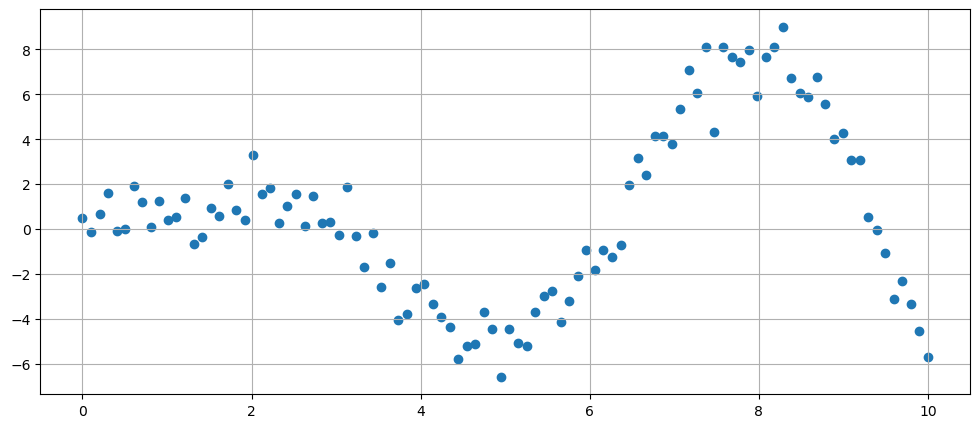

In [6]:
def true_f(x):
    """Prawdziwa funkcja, którą chcemy przybliżyć."""
    return x*np.sin(x)

rng = np.random.RandomState(42)

a, b = 0, 10
N = 100
X = np.linspace(a, b, N)
y = true_f(X) + rng.normal(0, 1, N)
fig = plt.figure(figsize=(12, 5))
plt.scatter(X, y)
plt.grid();

Regresja wielomianowa zadanego stopnia. Dla jednej zmiennej niezależnej $x$ jest to model postaci

$$
Y = w_0 + w_1 X + w_2 X^2 + \ldots + w_d X^d + \varepsilon.
$$

Ponieważ każda funkcja ciągła daje się niemal jednostajnie aproksymować wielomianami, więc, przynamniej teoretycznie, regresja wielomianowa może przybliżyć dowolną funkcję ciągłą z dowolną dokładnością na dowolnym przedziale ograniczonym i domkniętym. W praktyce jednak, regresja wielomianowa wysokiego stopnia jest niestabilna numerycznie i może szybko prowadzić do przeuczenia. Tym niemniej, regresja wielomianowa jest na tyle użyteczną metodą, że pakiet `scikit-learn` zawiera jej gotową implementację w klasie `sklearn.preprocessing.PolynomialFeatures`.

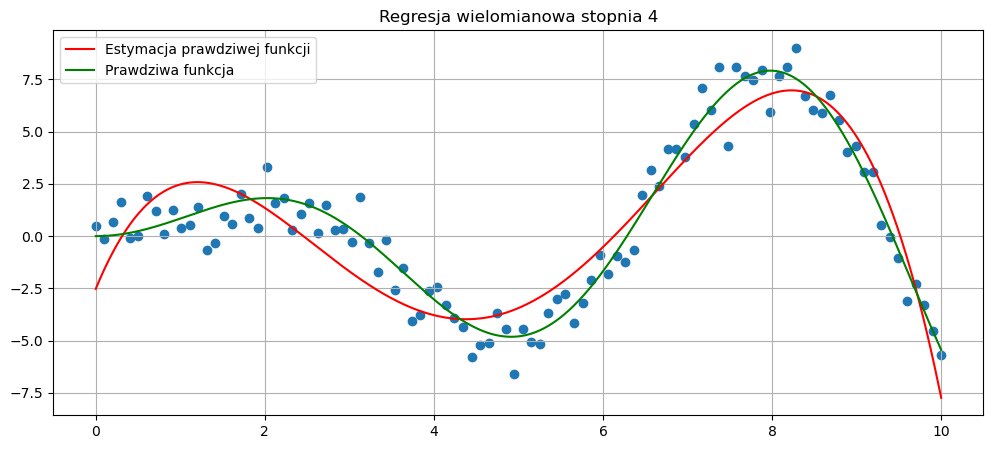

In [7]:
degree = 4 # stopień wielomianu

# Potok, na który składa się:
# - dodanie cech wielomianowych
# - regresja liniowa
model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])

# Macierz projektowa tworzona jest automatycznie przez potok
model.fit(X[:, np.newaxis], y)
X_new = np.linspace(a, b, 1000)
y_new = model.predict(X_new[:, np.newaxis])
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(X, y)
ax.plot(X_new, y_new, color='red', label='Estymacja prawdziwej funkcji')
ax.plot(X_new, true_f(X_new), color='green', label='Prawdziwa funkcja')
ax.grid()
ax.set_title(f'Regresja wielomianowa stopnia {degree}')
ax.legend();

Wykorzystujemy te same dane, co wcześniej, ale tym razem w roli funkcji bazowych używamy funkcji *ReLU* o centrach równomiernie rozmieszczonych na przedziale, z którego pochodzą dane. Funkcjonalność ta nie jest dostępna w `scikit-learn`, więc musimy zaimplementować ją sami.

In [8]:
def relu(x):
    """Funkcja aktywacji ReLU.
    
    Parametry
    ----------
    x : ndarray
        Tablica z wartościami, dla których ma zostać obliczona funkcja ReLU.
        
    Zwraca
    -------
    ndarray
        Tablica z wartościami funkcji ReLU dla każdego elementu z x.
    """
    return np.max(
        np.hstack([np.zeros_like(x)[:, np.newaxis], x[:, np.newaxis]]), axis=1
    )

def design_matrix(X, M):
    """Funkcja tworząca macierz projektową dla funkcji bazowych ReLU.
    
    Parametry
    ----------
    X : ndarray
        Tablica z wartościami, dla których mają zostać obliczone funkcje bazowe.
    M : int
        Liczba funkcji bazowych o równomiernie rozmieszczonych centrach.
    
    Zwraca
    -------
    ndarray
        Macierz projektowa z wartościami funkcji bazowych dla każdego elementu z X.
    """
    a, b = X.min(), X.max()
    centers = np.linspace(a, b, M - 1)
    Phi = relu(X[:, np.newaxis] - centers)
    Phi = np.hstack([np.ones_like(X)[:, np.newaxis], Phi])
    return Phi

Rozwiązanie z wybraną liczbą centrów. Widać, że model jest w stanie przybliżyć zadaną funkcję, nie jest jednak jasne, jaka liczba centrów jest optymalna.

In [9]:
M = 10
Phi = design_matrix(X, M)
model = LinearRegression()
model.fit(Phi, y)
# model.coef_, model.intercept_

LinearRegression()

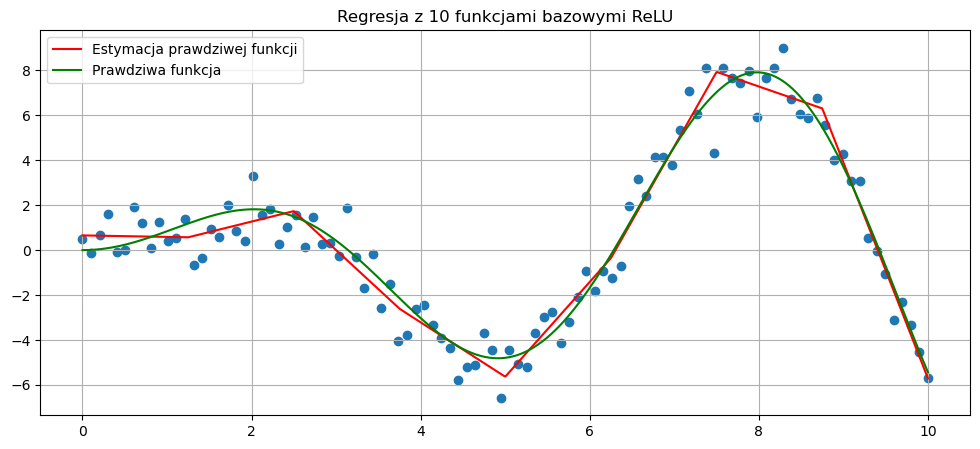

In [10]:
X_new = np.linspace(a, b, 1000)
Phi_new = design_matrix(X_new, M)
y_new = model.predict(Phi_new)
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(X, y)
ax.plot(X_new, y_new, color="red", label="Estymacja prawdziwej funkcji")
ax.plot(X_new, true_f(X_new), color="green", label="Prawdziwa funkcja")
ax.grid()
ax.set_title(f"Regresja z {M} funkcjami bazowymi ReLU")
ax.legend()